# Stock Investment Portfolio

## Risk and Return

https://www.investopedia.com/terms/r/riskreturntradeoff.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
start = '2016-01-01'
end = '2019-01-01'

In [3]:
df = pd.DataFrame()
data = []
for symbol in symbols:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
df.columns = data
df = df.dropna(axis='columns')
df.head()

,AAPL,MSFT,AMD,INTC,NVDA
Date,,,,,
2016-01-04,99.117409,50.877312,2.77,30.827848,31.779432
2016-01-05,96.633583,51.109421,2.75,30.682732,32.289936
2016-01-06,94.742485,50.181000,2.51,30.002504,30.954752
2016-01-07,90.743942,48.435574,2.28,28.877863,29.727560
2016-01-08,91.223770,48.584122,2.14,28.578564,29.089418


In [5]:
df.describe()

,AAPL,MSFT,AMD,INTC,NVDA
count,754.000000,754.000000,754.000000,754.000000,754.000000
mean,143.945670,73.636410,11.618581,38.214060,144.361086
std,38.613411,20.694553,6.300744,7.864819,79.976451
min,85.976913,45.602867,1.800000,25.819912,24.759874
25%,106.077578,54.727212,6.852500,32.593547,65.523840
50%,147.849899,68.537289,11.585000,34.563229,146.256576
75%,170.957218,91.912092,13.820000,45.633894,220.887279
max,229.392090,114.200455,32.720001,55.684013,288.443909


## Calculate Stock Returns

In [6]:
from IPython.display import Latex, HTML

Latex(r"""\begin{eqnarray}r_t = \frac{AdjClose_t - AdjClose_{t-1}}{AdjClose_{t-1}} = \frac{AdjClose_t}{AdjClose_{t-1}} - 1
\end{eqnarray}""")

<IPython.core.display.Latex object>

([<matplotlib.axis.YTick at 0x1901fcaf2b0>,
 <a list of 5 Text yticklabel objects>)

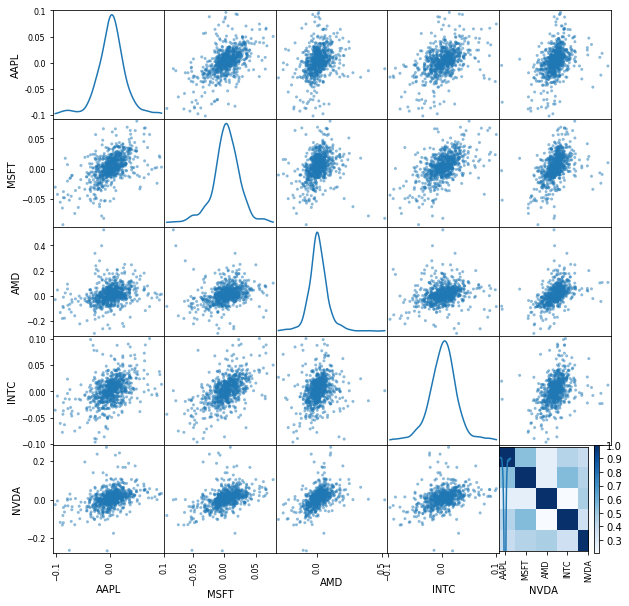

In [7]:
from pandas.plotting import scatter_matrix

rets = df.pct_change(periods=3)
scatter_matrix(rets, diagonal='kde', figsize=(10, 10))
corr = rets.corr()
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Text(0,0.5,'Standard Deviations')

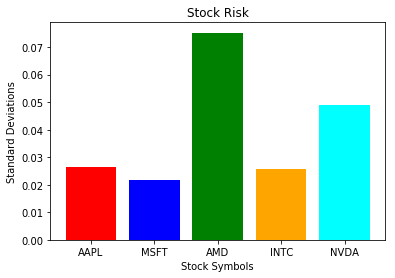

In [8]:
plt.bar(rets.columns, rets.std(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stock Symbols")
plt.ylabel("Standard Deviations")

Text(0,0.5,'Returns')

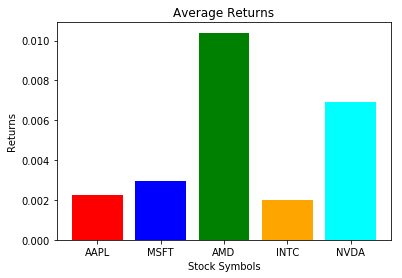

In [9]:
plt.bar(rets.columns, rets.mean(), color=['red', 'blue', 'green', 'orange', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stock Symbols")
plt.ylabel("Returns")

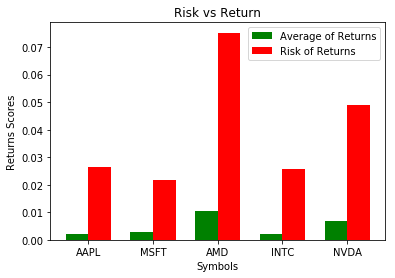

In [10]:
ind = np.arange(5)
width = 0.35       
plt.bar(ind, rets.mean(), width, color = 'g', label='Average of Returns')
plt.bar(ind + width, rets.std(), width, color = 'r', label='Risk of Returns')
plt.ylabel('Returns Scores')
plt.xlabel('Symbols')
plt.title('Risk vs Return')

plt.xticks(ind + width / 2, ('AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA'))
plt.legend(loc='best')
plt.show()

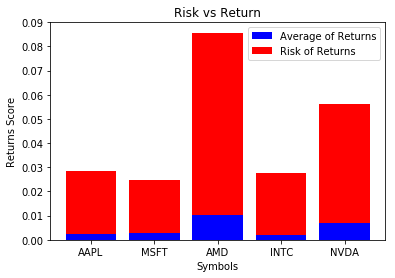

In [11]:
symbols = ['AAPL', 'MSFT', 'AMD', 'INTC', 'NVDA']
ind = [x for x, _ in enumerate(symbols)]

plt.bar(ind, rets.mean(), width=0.8, label='Average of Returns', color='b')
plt.bar(ind, rets.std(), width=0.8, label='Risk of Returns', color='r', bottom=rets.mean())

plt.xticks(ind, symbols)
plt.ylabel("Returns Score")
plt.xlabel("Symbols")
plt.legend(loc="upper right")
plt.title('Risk vs Return')
plt.show()

## Risk vs Expected Return

Table: Risk vs Expected Returns


,Expected Returns,Risk
AAPL,0.002242,0.026369
MSFT,0.002963,0.021786
AMD,0.010391,0.075234
INTC,0.001983,0.025785
NVDA,0.006929,0.049038


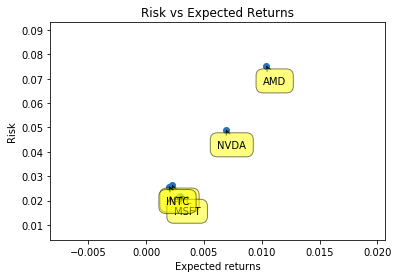

In [12]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk vs Expected Returns')
tables = pd.DataFrame(data=d)
tables    